In [32]:

import zipfile
import os
import zipfile
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



bd_2024 = pd.read_csv('focos_qmd_inpe_2024-01-01_2024-09-10_13.231475.csv')
bd_2024['geometry'] = bd_2024.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
focos_2024 = gpd.GeoDataFrame(bd_2024, geometry='geometry')
focos_2024.set_crs(epsg=4326, inplace=True)

from shapely import wkt
amazonia = pd.read_csv('focos_amazona_2003_2023.csv')
amazonia['centroide'] = amazonia['centroide'].apply(wkt.loads)

focos_serie = gpd.GeoDataFrame(amazonia, geometry='centroide')
focos_serie.set_crs(epsg=4326, inplace=True)
focos_serie.rename(columns={'data_hora': 'DataHora'}, inplace=True)

focos_serie
zip_file_path_UC = 'H:\Infoamazonia\shapes\conservation_units_legal_amazon.zip'
extracted_folder_UC = 'H:\Infoamazonia\shapes\conservation_units_legal_amazon'

with zipfile.ZipFile(zip_file_path_UC, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_UC)

shapefile_path_UC = os.path.join(extracted_folder_UC, 'H:\Infoamazonia\shapes\conservation_units_legal_amazon\conservation_units_legal_amazon.shp')
areas_gdf_UC = gpd.read_file(shapefile_path_UC)
focos_UC = gpd.overlay(focos_2024, areas_gdf_UC, how='intersection')
print(focos_UC)

areas_gdf_UC = gpd.read_file(shapefile_path_UC)
hist_UC = gpd.overlay(focos_serie, areas_gdf_UC, how='intersection')
print(hist_UC)

<>:26: SyntaxWarning: invalid escape sequence '\I'
<>:27: SyntaxWarning: invalid escape sequence '\I'
<>:32: SyntaxWarning: invalid escape sequence '\I'
<>:26: SyntaxWarning: invalid escape sequence '\I'
<>:27: SyntaxWarning: invalid escape sequence '\I'
<>:32: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20424\2519693566.py:26: SyntaxWarning: invalid escape sequence '\I'
  zip_file_path_UC = 'H:\Infoamazonia\shapes\conservation_units_legal_amazon.zip'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20424\2519693566.py:27: SyntaxWarning: invalid escape sequence '\I'
  extracted_folder_UC = 'H:\Infoamazonia\shapes\conservation_units_legal_amazon'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20424\2519693566.py:32: SyntaxWarning: invalid escape sequence '\I'
  shapefile_path_UC = os.path.join(extracted_folder_UC, 'H:\Infoamazonia\shapes\conservation_units_legal_amazon\conservation_units_legal_amazon.shp')
C:\Users\Usuario\AppData\Local\Temp\ipy

                  DataHora  Satelite    Pais    Estado   Municipio     Bioma  \
0      2024/01/02 17:09:00  AQUA_M-T  Brasil     AMAPÁ       AMAPÁ  Amazônia   
1      2024/01/04 16:52:00  AQUA_M-T  Brasil  MARANHÃO     MATINHA  Amazônia   
2      2024/01/04 16:52:00  AQUA_M-T  Brasil  MARANHÃO     MATINHA  Amazônia   
3      2024/01/04 16:52:00  AQUA_M-T  Brasil  MARANHÃO     MATINHA  Amazônia   
4      2024/01/04 16:52:00  AQUA_M-T  Brasil  MARANHÃO   SÃO BENTO  Amazônia   
...                    ...       ...     ...       ...         ...       ...   
11020  2024/09/10 17:05:00  AQUA_M-T  Brasil      PARÁ  SALVATERRA  Amazônia   
11021  2024/09/10 17:05:00  AQUA_M-T  Brasil      PARÁ      CHAVES  Amazônia   
11022  2024/09/10 17:05:00  AQUA_M-T  Brasil      PARÁ      CHAVES  Amazônia   
11023  2024/09/10 17:05:00  AQUA_M-T  Brasil      PARÁ  CURRALINHO  Amazônia   
11024  2024/09/10 17:05:00  AQUA_M-T  Brasil      PARÁ  CURRALINHO  Amazônia   

       DiaSemChuva  Precipitacao  Risco

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20424\2519693566.py:38: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  hist_UC = gpd.overlay(focos_serie, areas_gdf_UC, how='intersection')


         ano  sigla_uf  id_municipio                 id_municipio_nome  \
0       2003        MT       5105507  Vila Bela da Santíssima Trindade   
1       2003        MT       5105507  Vila Bela da Santíssima Trindade   
2       2003        MT       5105507  Vila Bela da Santíssima Trindade   
3       2003        MT       5105507  Vila Bela da Santíssima Trindade   
4       2003        MT       5105507  Vila Bela da Santíssima Trindade   
...      ...       ...           ...                               ...   
228920  2023  AMAZONAS            -8                     NOVO ARIPUANÃ   
228921  2023  AMAZONAS            -8                     NOVO ARIPUANÃ   
228922  2023  AMAZONAS            -8                          MANICORÉ   
228923  2023  AMAZONAS            -8                          MANICORÉ   
228924  2023  AMAZONAS            -8                          IRANDUBA   

           bioma    id_bdq                               id_foco  \
0       Amazônia  13603477  87776547-5aba-1

In [55]:
hist_UC['DataHora'] = pd.to_datetime(hist_UC['DataHora'])
start_date = '07-01'
end_date = '09-10'
mask = (hist_UC['DataHora'].dt.strftime('%m-%d') >= start_date) & (hist_UC['DataHora'].dt.strftime('%m-%d') <= end_date)
hist_UC_filtered = hist_UC[mask]
df_focos_por_ano = hist_UC_filtered.groupby([hist_UC_filtered['DataHora'].dt.year, 'nome']).agg(quantidade_focos=('id', 'count')).reset_index()
df_focos_por_ano
focos_UC['DataHora'] = pd.to_datetime(focos_UC['DataHora'])
start_date = '07-01'
end_date = '09-10'
mask_b = (focos_UC['DataHora'].dt.strftime('%m-%d') >= start_date) & (focos_UC['DataHora'].dt.strftime('%m-%d') <= end_date)
hist_UC_filtered_b = focos_UC[mask_b]
df_focos_ano_b = hist_UC_filtered_b.groupby([hist_UC_filtered_b['DataHora'].dt.year, 'nome']).agg(quantidade_focos=('id', 'count')).reset_index()
df_focos_ano_b
df_focos_por_ano.rename(columns={'data_hora': 'DataHora'}, inplace=True)
df_focos_ano_b.rename(columns={'data_hora': 'DataHora'}, inplace=True)
df_concatenado = pd.concat([df_focos_por_ano, df_focos_ano_b], ignore_index=True)


df_concatenado


,DataHora,nome,quantidade_focos
0,2003,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,160
1,2003,ESTAÇÃO ECOLÓGICA DE CUNIÃ,5
2,2003,ESTAÇÃO ECOLÓGICA SAMUEL,25
3,2003,ESTAÇÃO ECOLÓGICA SERRA DOS TRÊS IRMÃOS,2
4,2003,ESTAçãO ECOLóGICA DO RIO RONURO,3
...,...,...,...
2723,2024,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,3493
2724,2024,ÁREA DE PROTEçãO AMBIENTAL DA BAIXADA MARANHENSE,93
2725,2024,ÁREA DE PROTEçãO AMBIENTAL DAS REENTRâNCIAS MA...,197
2726,2024,ÁREA DE PROTEçãO AMBIENTAL DE UPAON-AçU / MIRI...,26


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20424\3243035700.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


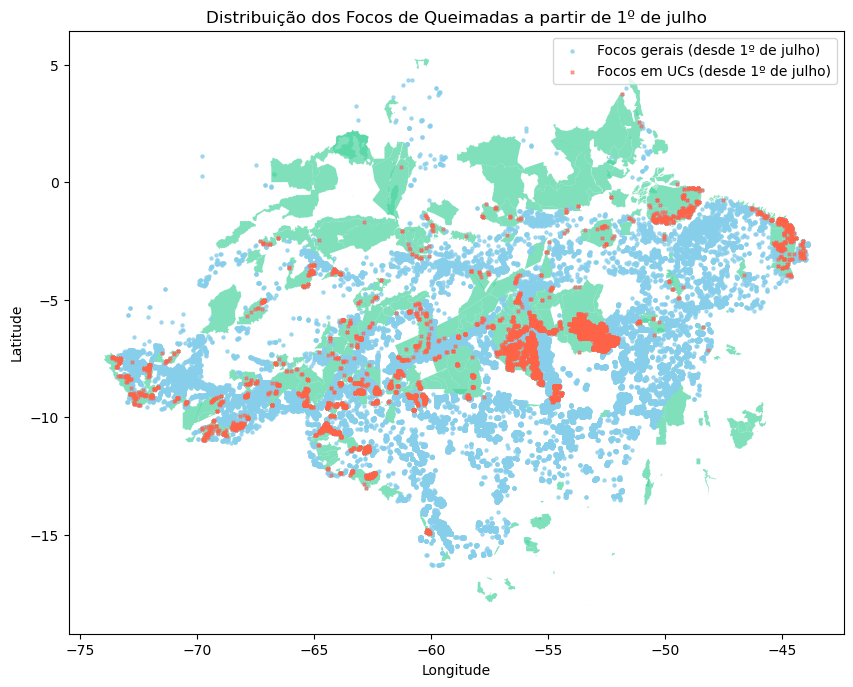

In [33]:
julho = pd.Timestamp('2024-07-01')

focos_2024['DataHora'] = pd.to_datetime(focos_2024['DataHora'], format='%Y/%m/%d %H:%M:%S')
focos_UC['DataHora'] = pd.to_datetime(focos_UC['DataHora'], format='%Y/%m/%d %H:%M:%S')

geo_df_july = focos_2024[focos_2024['DataHora'] >= julho]
focos_UC_july = focos_UC[focos_UC['DataHora'] >= julho]

fig, ax = plt.subplots(figsize=(10, 10))

areas_gdf_UC.plot(ax=ax, marker='^', color='#4cd4a0', markersize=5, label='Unidades de Conservação', alpha=0.7)  
geo_df_july.plot(ax=ax, marker='o', color='#87CEEB', markersize=5, label='Focos gerais (desde 1º de julho)', alpha=0.7)  # Azul suave
focos_UC_july.plot(ax=ax, marker='x', color='#FF6347', markersize=5, label='Focos em UCs (desde 1º de julho)', alpha=0.7)  # Verde suave


plt.title('Distribuição dos Focos de Queimadas a partir de 1º de julho')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc='upper right')

plt.show()


In [34]:

UC_ranking = focos_UC['nome'].value_counts().reset_index()
UC_ranking.columns = ['nome', 'total_focos']

focos_por_dia_UC = focos_UC.groupby(focos_UC['DataHora'].dt.date).size()

focos_por_dia_por_UC = focos_UC.groupby([focos_UC['DataHora'].dt.date, 'nome']).size().unstack(fill_value=0)

media_focos_por_dia_UC = focos_por_dia_por_UC.mean().reset_index()
media_focos_por_dia_UC.columns = ['nome', 'media_focos_por_dia']

UC_ranking = pd.merge(UC_ranking, media_focos_por_dia_UC, on='nome')

UC_ranking


,nome,total_focos,media_focos_por_dia
0,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,3503,19.903409
1,FLORESTA NACIONAL DO JAMANXIM,1657,9.414773
2,ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS,812,4.613636
3,PARQUE ESTADUAL DE GUAJARÁ-MIRIM,586,3.329545
4,RESERVA BIOLÓGICA NASCENTES SERRA DO CACHIMBO,286,1.625000
...,...,...,...
152,PARQUE ESTADUAL DA SERRA DOS MARTÍRIOS/ANDORINHAS,1,0.005682
153,PARQUE NACIONAL DO JAÚ,1,0.005682
154,ESTAÇÃO ECOLÓGICA DO GRÃO PARÁ,1,0.005682
155,PARQUE ESTADUAL SERRA SANTA BÁRBARA,1,0.005682


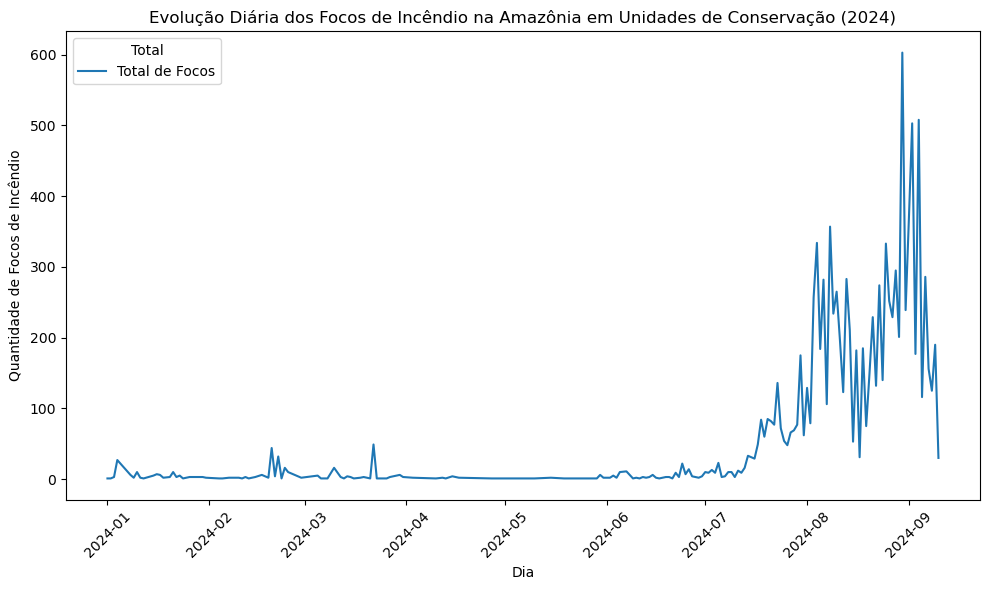

In [35]:


data_dia = focos_UC
data_dia['Dia'] = focos_UC['DataHora'].dt.date
focos_totais_por_dia = data_dia.groupby(['Dia']).agg(
    quantidade_focos=('FRP', 'count')
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(focos_totais_por_dia['Dia'], focos_totais_por_dia['quantidade_focos'], label='Total de Focos')

plt.xticks(rotation=45)
plt.xlabel('Dia')
plt.ylabel('Quantidade de Focos de Incêndio')
plt.title('Evolução Diária dos Focos de Incêndio na Amazônia em Unidades de Conservação (2024)')
plt.legend(title="Total")
plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

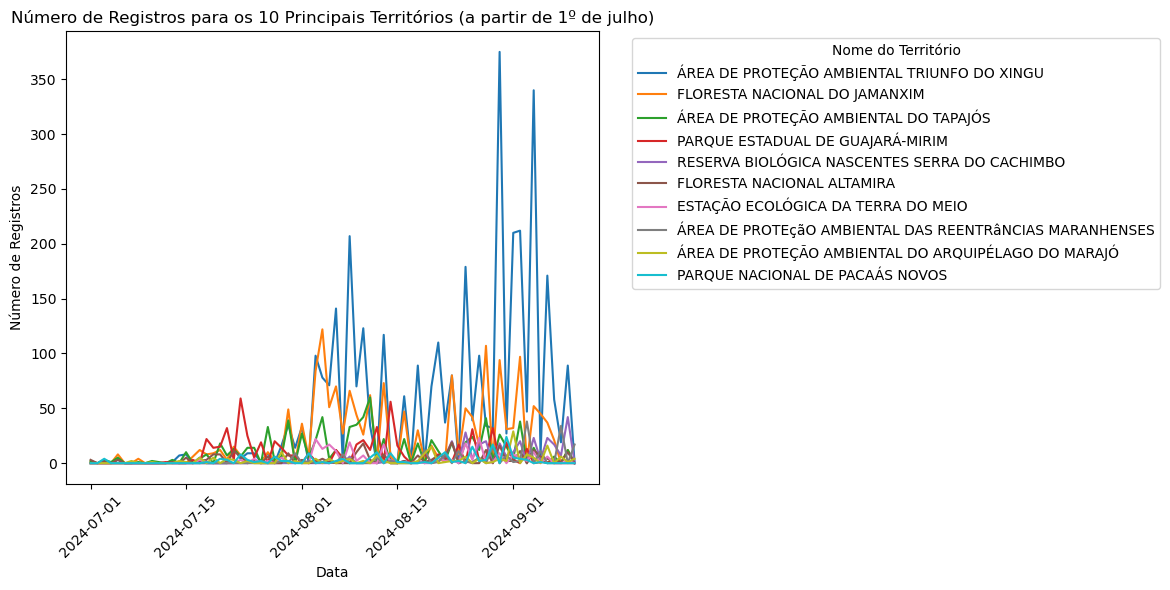

In [36]:
julho = pd.Timestamp('2024-07-01')
focos_UC_july = focos_UC[focos_UC['DataHora'] >= julho]
uc_counts = focos_UC_july.groupby([focos_UC_july['DataHora'].dt.date, 'nome']).size().unstack(fill_value=0)
top_10_territories = focos_UC_july['nome'].value_counts().head(10).index
uc_counts_top_10 = uc_counts[top_10_territories]
plt.figure(figsize=(12, 6))
uc_counts_top_10.plot(kind='line', figsize=(12, 6))
plt.title('Número de Registros para os 10 Principais Territórios (a partir de 1º de julho)')
plt.xlabel('Data')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.legend(title='Nome do Território', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

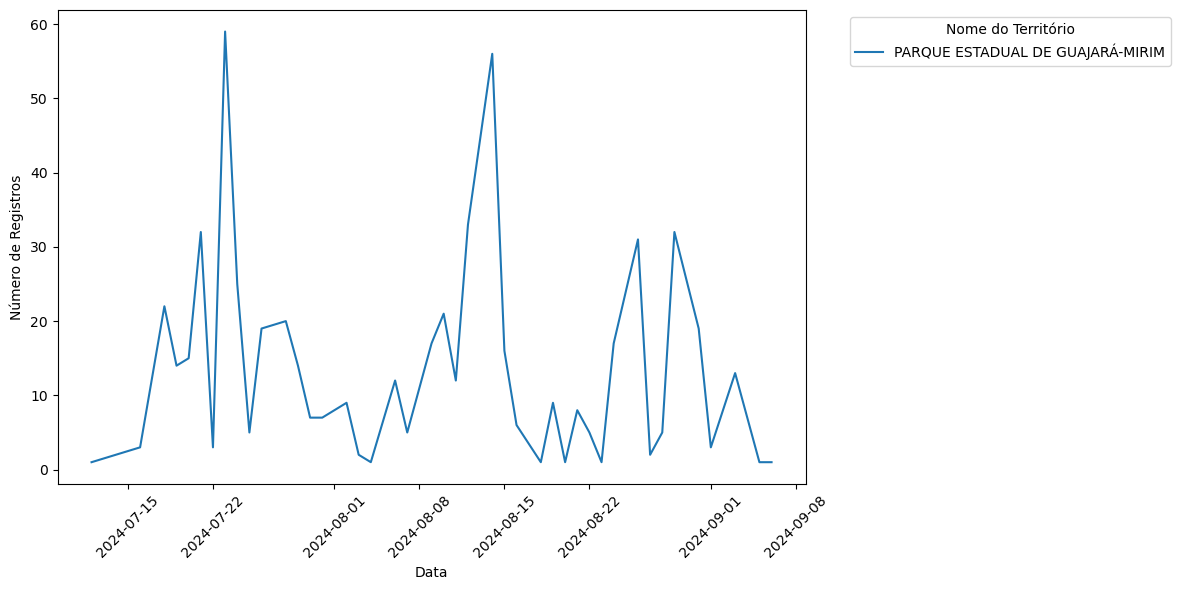

In [37]:
julho = pd.Timestamp('2024-07-01')
guajara = focos_UC_july[focos_UC_july['nome'] == 'PARQUE ESTADUAL DE GUAJARÁ-MIRIM']
focos_UC_july = focos_UC[focos_UC['DataHora'] >= julho]
guajara = guajara.groupby([guajara['DataHora'].dt.date, 'nome']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
guajara.plot(kind='line', figsize=(12, 6))

plt.xlabel('Data')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.legend(title='Nome do Território', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar o gráfico
plt.show()


<Figure size 1200x600 with 0 Axes>

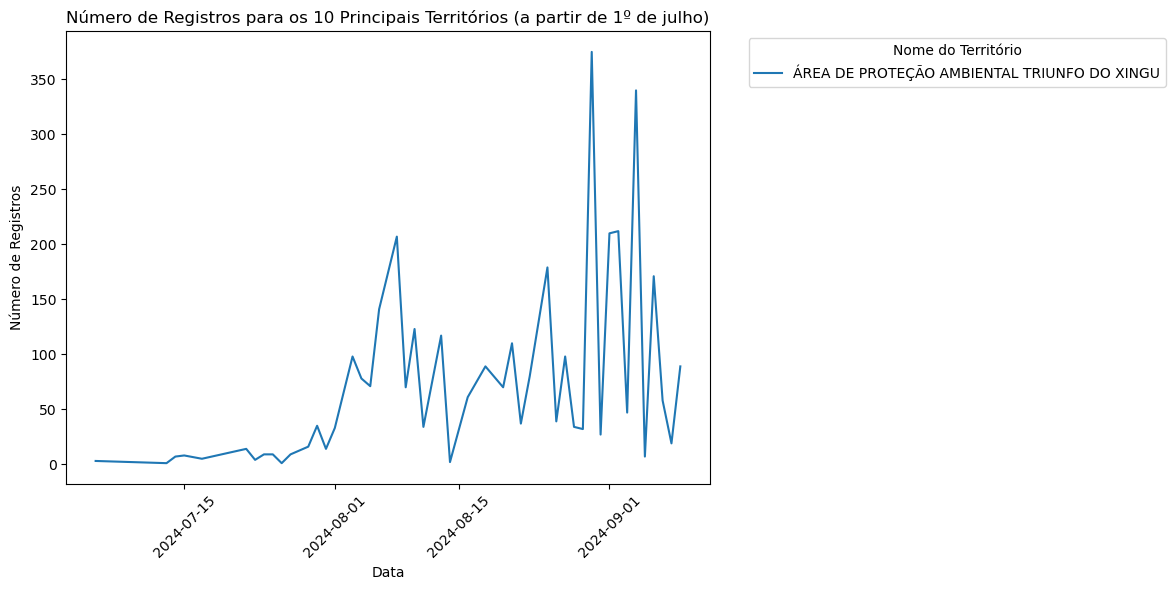

In [38]:
julho = pd.Timestamp('2024-07-01')
guajara = focos_UC_july[focos_UC_july['nome'] == 'ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU']
focos_UC_july = focos_UC[focos_UC['DataHora'] >= julho]
guajara = guajara.groupby([guajara['DataHora'].dt.date, 'nome']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
guajara.plot(kind='line', figsize=(12, 6))

plt.title('Número de Registros para os 10 Principais Territórios (a partir de 1º de julho)')
plt.xlabel('Data')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.legend(title='Nome do Território', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar o gráfico
plt.show()


c:\Users\Usuario\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


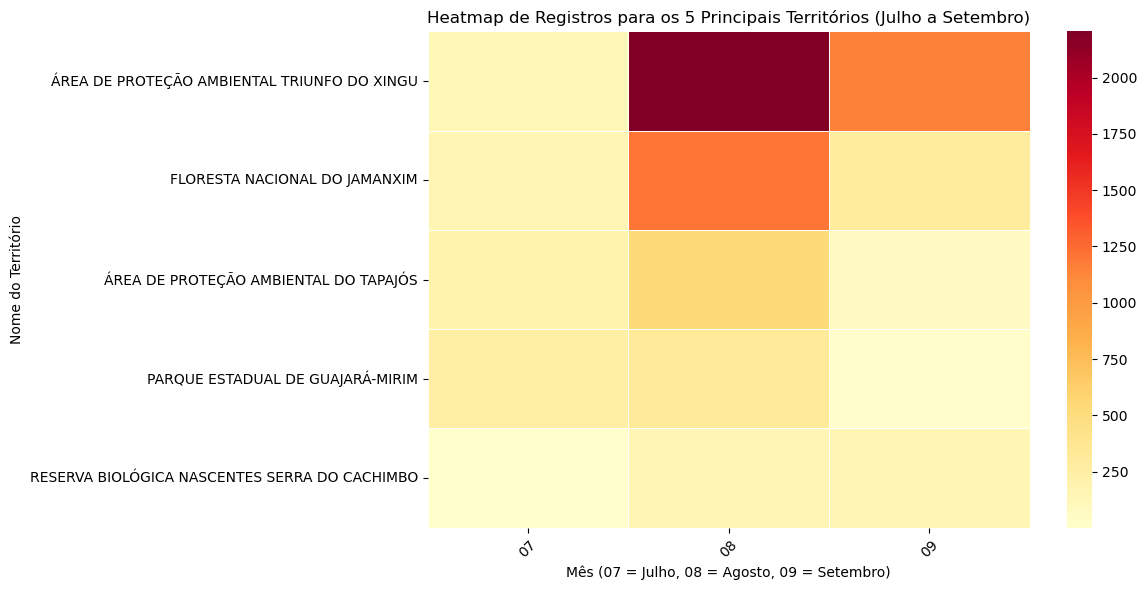

In [39]:
julho = pd.Timestamp('2024-07-01')
focos_UC_july = focos_UC[focos_UC['DataHora'] >= julho]

focos_UC_july['Month'] = focos_UC_july['DataHora'].dt.strftime('%m')

uc_counts_month = focos_UC_july.groupby(['Month', 'nome']).size().unstack(fill_value=0)

top_5_territories = focos_UC_july['nome'].value_counts().head(5).index
uc_counts_top_5 = uc_counts_month[top_5_territories]

plt.figure(figsize=(12, 6))
sns.heatmap(uc_counts_top_5.T, cmap='YlOrRd', linewidths=0.5, linecolor='white')

plt.title('Heatmap de Registros para os 5 Principais Territórios (Julho a Setembro)')
plt.xlabel('Mês (07 = Julho, 08 = Agosto, 09 = Setembro)')
plt.ylabel('Nome do Território')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


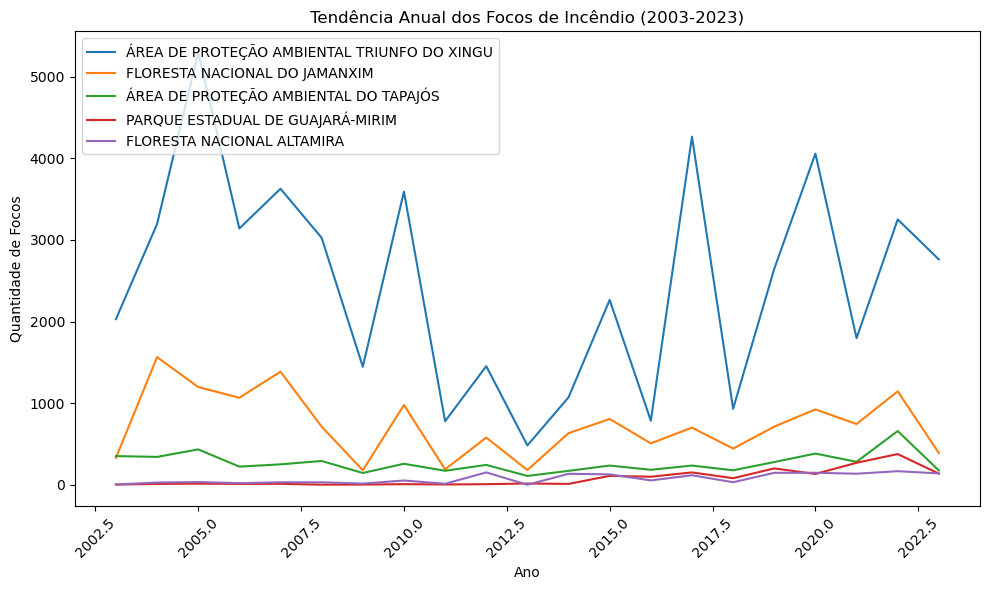

In [40]:
# Certificando-se de que a coluna 'data_hora' está em formato datetime
hist_UC['DataHora'] = pd.to_datetime(hist_UC['DataHora'])

# Agrupar os dados por ano e município
tendencia_anual = hist_UC.groupby([hist_UC['DataHora'].dt.year, 'nome']).agg(quantidade_focos=('id_foco', 'count')).reset_index()

# Criar gráfico de linha para a evolução dos focos por Unidade de Conservação (nome)
plt.figure(figsize=(10,6))

# Lista de Unidades de Conservação para o gráfico
nomes_UCs = ['ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU', 
             'FLORESTA NACIONAL DO JAMANXIM', 
             'ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS', 
             'PARQUE ESTADUAL DE GUAJARÁ-MIRIM', 
             'FLORESTA NACIONAL ALTAMIRA']

for nome in nomes_UCs:
    plt.plot(tendencia_anual[tendencia_anual['nome'] == nome]['DataHora'], 
             tendencia_anual[tendencia_anual['nome'] == nome]['quantidade_focos'], label=nome)

plt.title('Tendência Anual dos Focos de Incêndio (2003-2023)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Focos')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


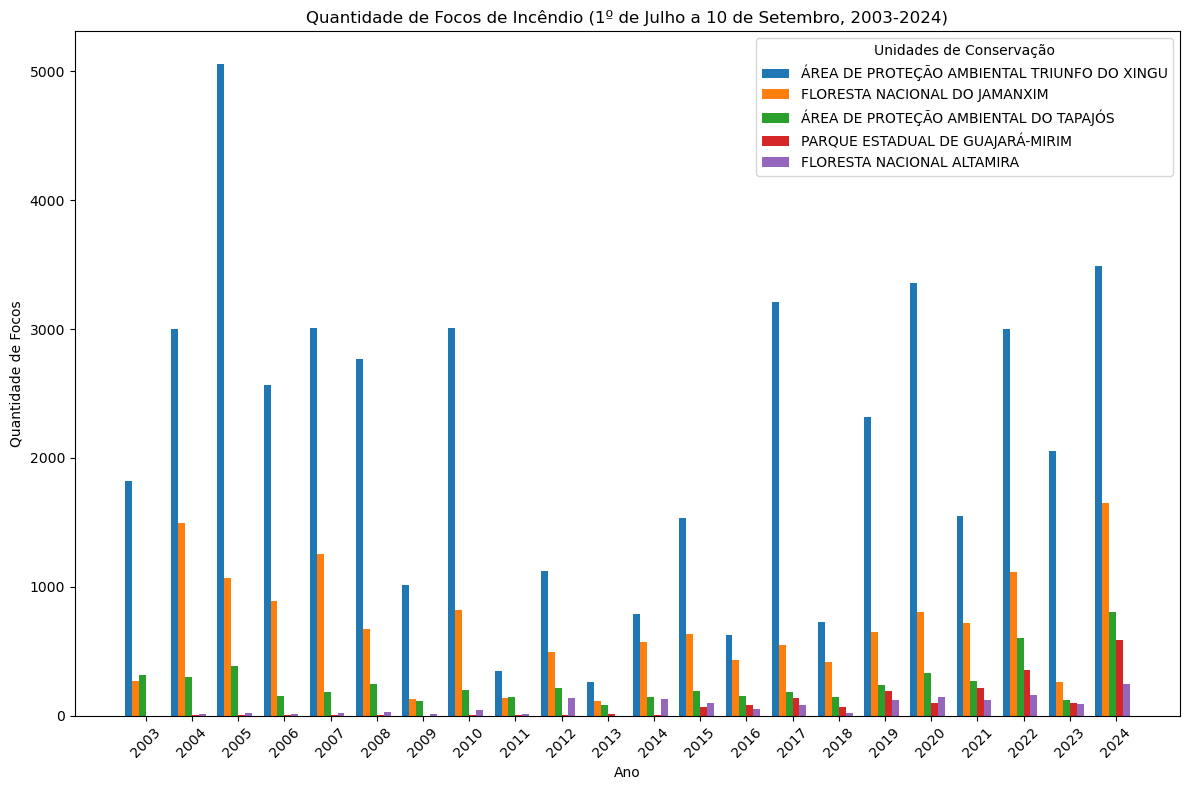

In [57]:
import numpy as np
import matplotlib.pyplot as plt

df_historico = df_concatenado

nomes_UCs = ['ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU', 
             'FLORESTA NACIONAL DO JAMANXIM', 
             'ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS', 
             'PARQUE ESTADUAL DE GUAJARÁ-MIRIM', 
             'FLORESTA NACIONAL ALTAMIRA']

df_filtrado = df_historico[df_historico['nome'].isin(nomes_UCs)]
tendencia_anual = df_filtrado.groupby(['DataHora', 'nome']).agg(quantidade_focos=('quantidade_focos', 'sum')).reset_index()
anos = tendencia_anual['DataHora'].unique()
pivot_data = tendencia_anual.pivot_table(index='DataHora', columns='nome', values='quantidade_focos', fill_value=0)
bar_width = 0.15
indice = np.arange(len(anos))  # Índices para os anos
plt.figure(figsize=(12,8))
for i, nome in enumerate(nomes_UCs):
    plt.bar(indice + i * bar_width, pivot_data[nome], width=bar_width, label=nome)

plt.xticks(indice + bar_width * (len(nomes_UCs) / 2), anos.astype(int), rotation=45)

plt.title('Quantidade de Focos de Incêndio (1º de Julho a 10 de Setembro, 2003-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Focos')
plt.legend(title="Unidades de Conservação")
plt.tight_layout()

plt.show()


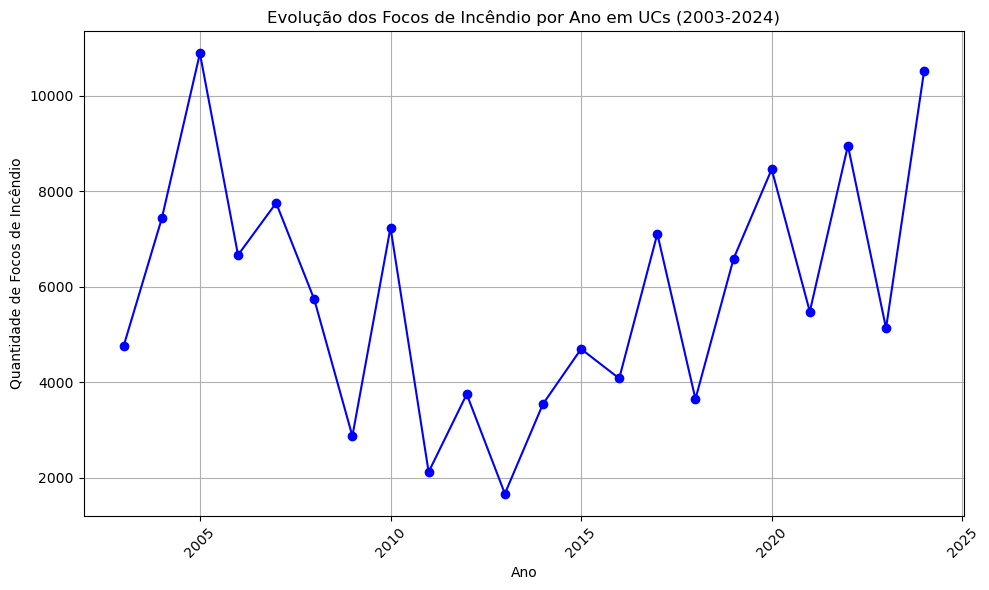

In [61]:

focos_por_ano = df_historico.groupby('DataHora')['quantidade_focos'].sum().reset_index()
focos_por_uc = df_historico.groupby('nome')['quantidade_focos'].sum().reset_index().sort_values(by='quantidade_focos', ascending=False)
plt.figure(figsize=(10,6))
plt.plot(focos_por_ano['DataHora'], focos_por_ano['quantidade_focos'], marker='o', color='b')
plt.title('Evolução dos Focos de Incêndio por Ano em UCs (2003-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Focos de Incêndio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [51]:
hist_UC

,ano,sigla_uf,id_municipio,id_municipio_nome,bioma,id_bdq,id_foco,DataHora,id,nome,categoria,grupo,esfera,ano_cria,geometry
0,2003,MT,5105507,Vila Bela da Santíssima Trindade,Amazônia,13603477,87776547-5aba-11e8-911c-28924ad12c5c,2003-10-16 17:43:00,286,PARQUE ESTADUAL SERRA RICARDO FRANCO,Parque,PI,estadual,1997,POINT (-60.216 -14.729)
1,2003,MT,5105507,Vila Bela da Santíssima Trindade,Amazônia,13505935,8565954c-5aba-11e8-911c-28924ad12c5c,2003-10-13 17:12:00,286,PARQUE ESTADUAL SERRA RICARDO FRANCO,Parque,PI,estadual,1997,POINT (-60.156 -14.756)
2,2003,MT,5105507,Vila Bela da Santíssima Trindade,Amazônia,11693216,875014f5-5aba-11e8-911c-28924ad12c5c,2003-08-15 17:30:00,286,PARQUE ESTADUAL SERRA RICARDO FRANCO,Parque,PI,estadual,1997,POINT (-60.243 -14.538)
3,2003,MT,5105507,Vila Bela da Santíssima Trindade,Amazônia,13603230,856749ee-5aba-11e8-911c-28924ad12c5c,2003-10-16 17:43:00,286,PARQUE ESTADUAL SERRA RICARDO FRANCO,Parque,PI,estadual,1997,POINT (-60.195 -14.745)
4,2003,MT,5105507,Vila Bela da Santíssima Trindade,Amazônia,14692848,8789050f-5aba-11e8-911c-28924ad12c5c,2003-12-21 17:31:00,286,PARQUE ESTADUAL SERRA RICARDO FRANCO,Parque,PI,estadual,1997,POINT (-60.457 -14.278)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228920,2023,AMAZONAS,-8,NOVO ARIPUANÃ,Amazônia,-4,-2,2023-08-22 18:09:00,1113,FLORESTA NACIONAL DO ARIPUANÃ,Floresta,US,federal,e 2016 de 11/05/2016,POINT (-61.09745 -7.41485)
228921,2023,AMAZONAS,-8,NOVO ARIPUANÃ,Amazônia,-4,-2,2023-08-22 18:09:00,1113,FLORESTA NACIONAL DO ARIPUANÃ,Floresta,US,federal,e 2016 de 11/05/2016,POINT (-61.08728 -7.41334)
228922,2023,AMAZONAS,-8,MANICORÉ,Amazônia,-4,-2,2023-08-22 18:09:00,518,RESERVA EXTRATIVISTA DO LAGO DO CAPANÃ GRANDE,Reserva Extrativista,US,federal,2004,POINT (-61.90344 -6.01272)
228923,2023,AMAZONAS,-8,MANICORÉ,Amazônia,-4,-2,2023-08-22 18:09:00,44,RESERVA DE DESENVOLVIMENTO SUSTENTAVEL DO RIO ...,Reserva de Desenvolvimento Sustentável,US,estadual,2006,POINT (-60.96336 -5.52262)
